In [6]:
import paramiko
import time
import pandas as pd
from collections import defaultdict
import psycopg2
import config
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



def get_connection():
    connection = psycopg2.connect(user="rtu170",
                                  password="deac2022",
                                  host="192.168.99.165",
                                  port="5432",
                                  database="ExDatiDB")
    return connection


# Aizver savienojumu ar datu bāzi
def close_connection(connection):
    if connection:
        connection.close()

def read_database():
    laiks=[]
    dati=[]
    sensorid=[]
    datums = "30-01-2023 10:00:00"
    datums1= datetime.strptime(datums, '%d-%m-%Y %H:%M:%S')
    try:
        connection = get_connection()
        cursor = connection.cursor()
        postgreSQL_select_Query = "select * from zabbixdati"
        cursor.execute(postgreSQL_select_Query)
        exdatidb = cursor.fetchall()

        for row in exdatidb:
            #print(datums1)
            #print(row[1])
            laik3=str(row[1])[:16]
            laiks4=datetime.strptime(laik3, '%Y-%m-%d %H:%M')
            if datums1 <= laiks4:
                laiks.append(row[4])
                dati.append(row[2])
                sensorid.append(row[5])
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Error while getting data", error)
    return laiks,dati,sensorid

laiks,dati,sensorid=read_database()
sensoruDictionary={}
idx=0
for sensoraid in sensorid:
    if sensoraid in sensoruDictionary.keys():
        sensoruDictionary[sensoraid].append((dati[idx],laiks[idx]))
    else:
        sensoruDictionary[sensoraid]=[]
        sensoruDictionary[sensoraid].append((dati[idx],laiks[idx]))
    idx+=1


In [7]:
valuex1=[]
laiksx1=[]
for tupl in sensoruDictionary['926349']:
    valuex1.append(float(tupl[0]))
    laiksx1.append(tupl[1])
print(valuex1)

[53.9, 53.7, 53.0, 52.3, 52.7, 51.4, 51.1, 52.0, 51.3, 51.7, 52.1, 51.3, 53.1, 53.1, 52.0, 51.6, 52.9, 52.3, 52.1, 51.4, 51.7, 53.0, 53.0, 51.3, 50.7, 53.0, 52.0, 53.4, 51.6, 51.1, 53.6, 52.0, 52.9, 51.6, 53.0, 53.0, 53.1, 51.6, 52.7, 51.9, 51.4, 52.0, 52.4, 52.3, 52.6]


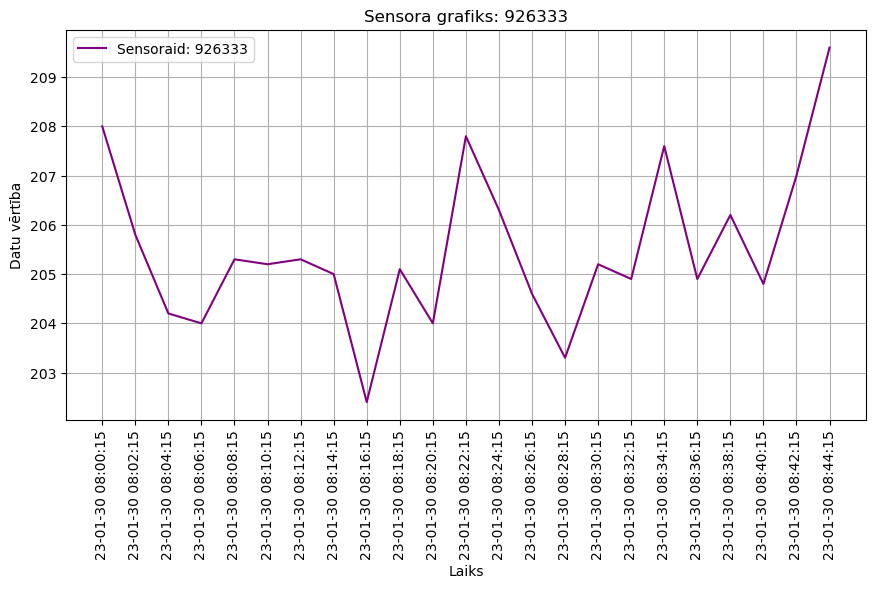

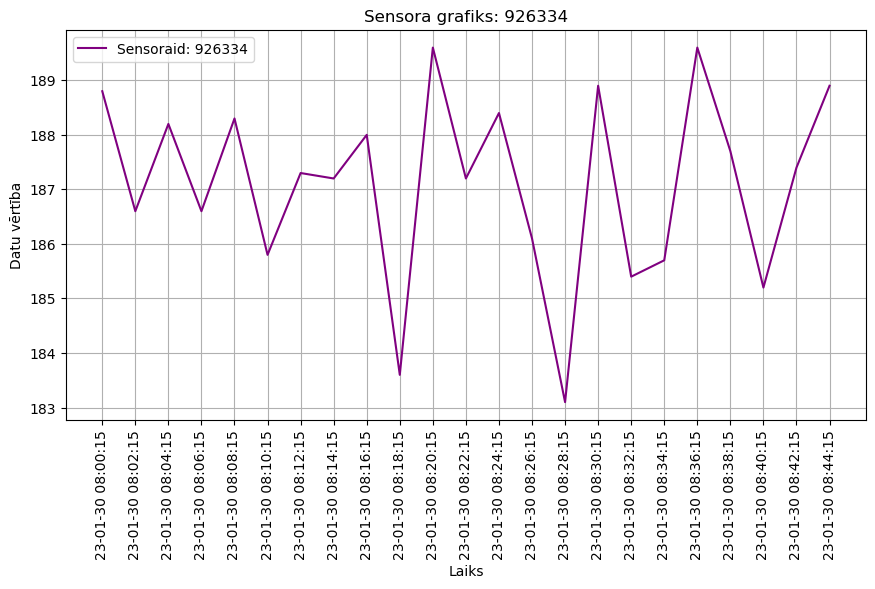

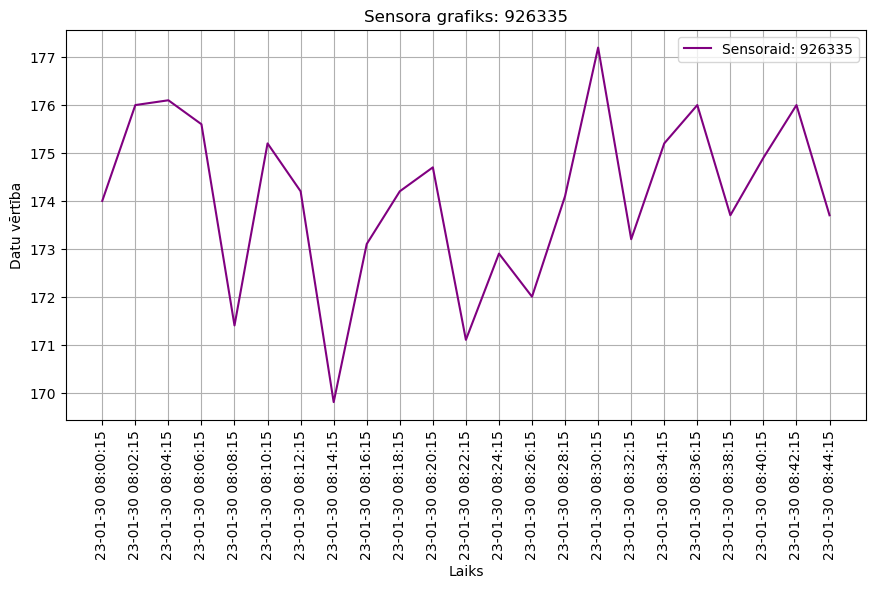

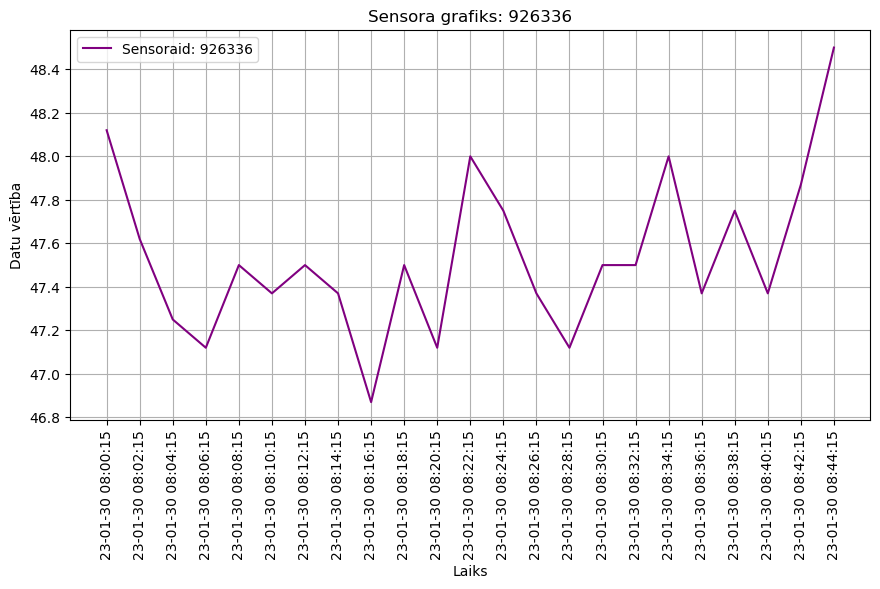

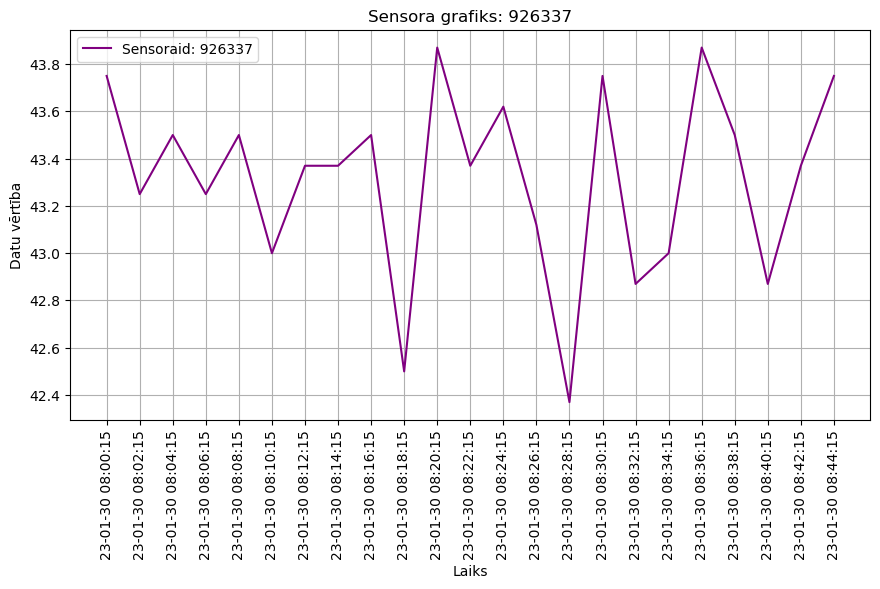

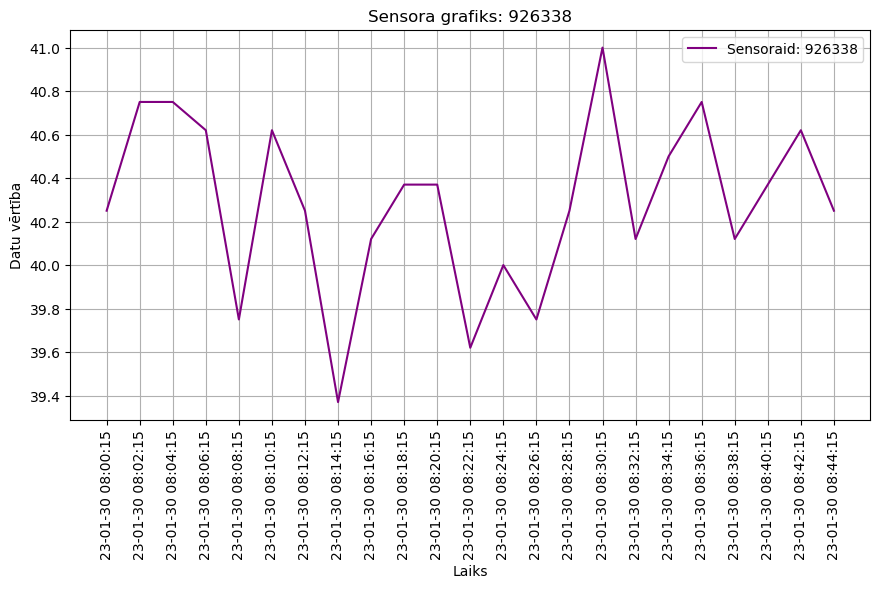

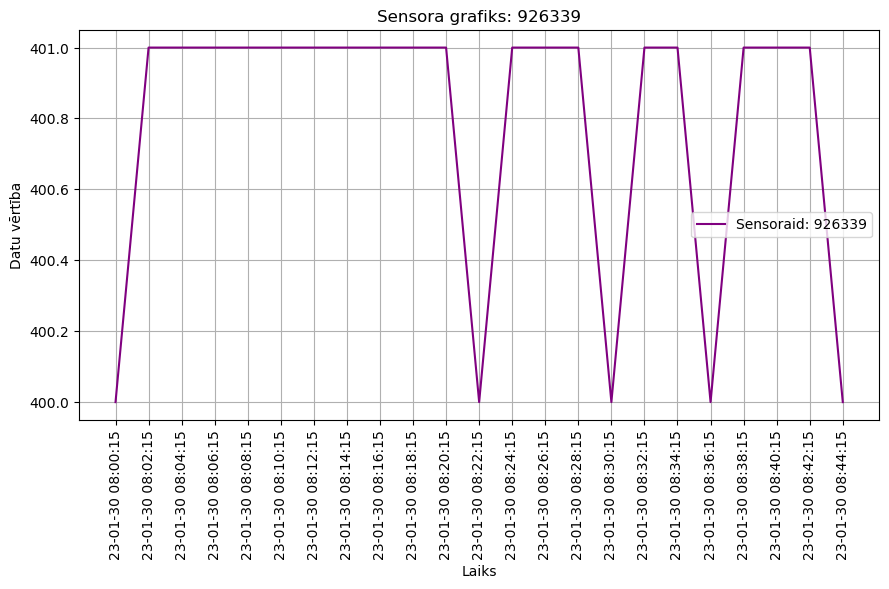

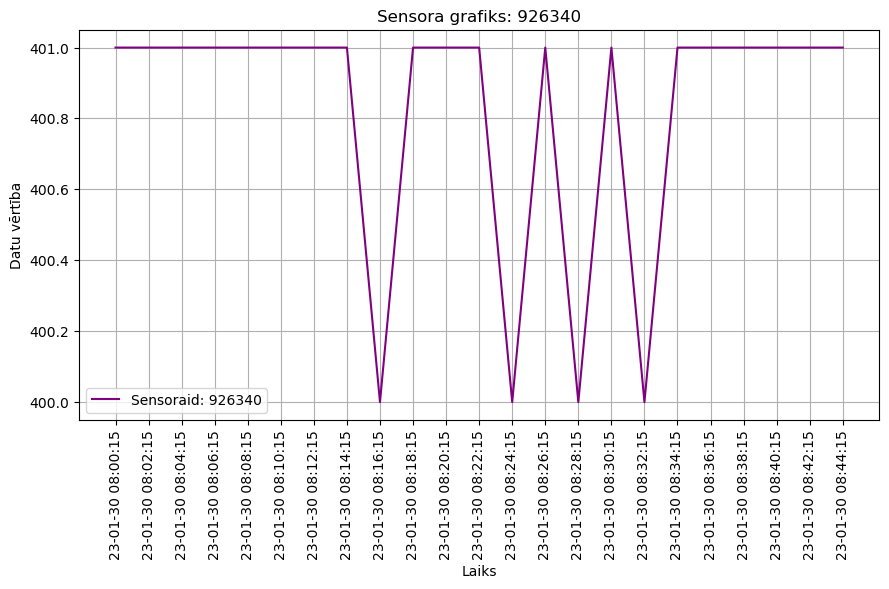

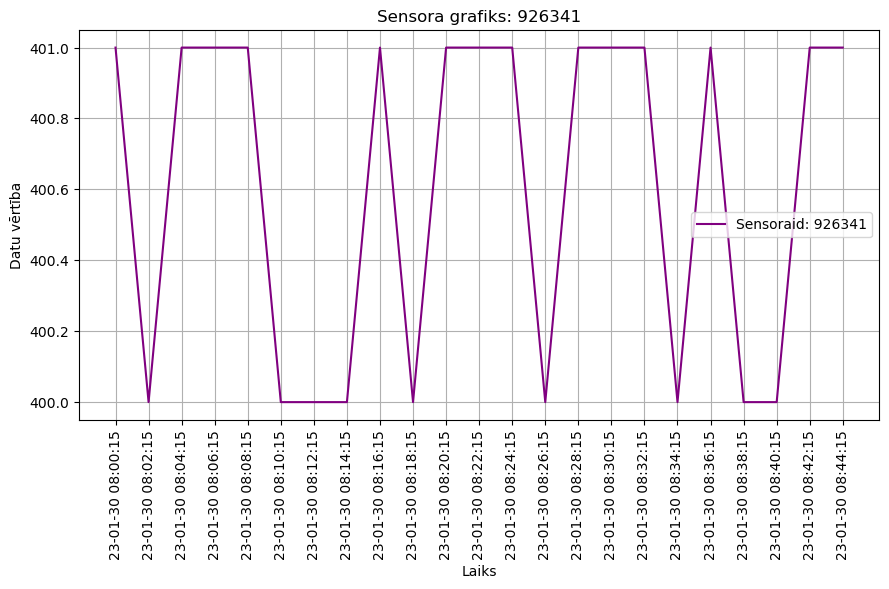

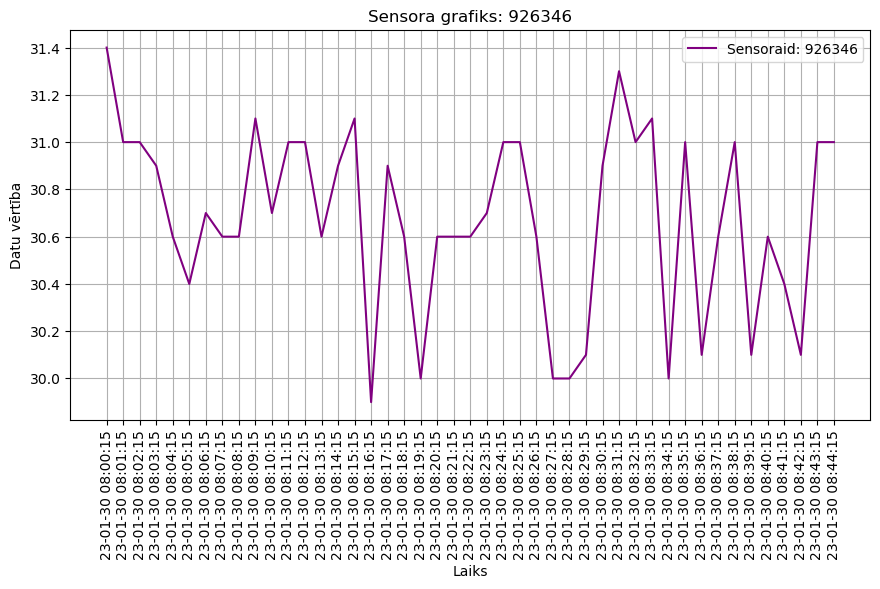

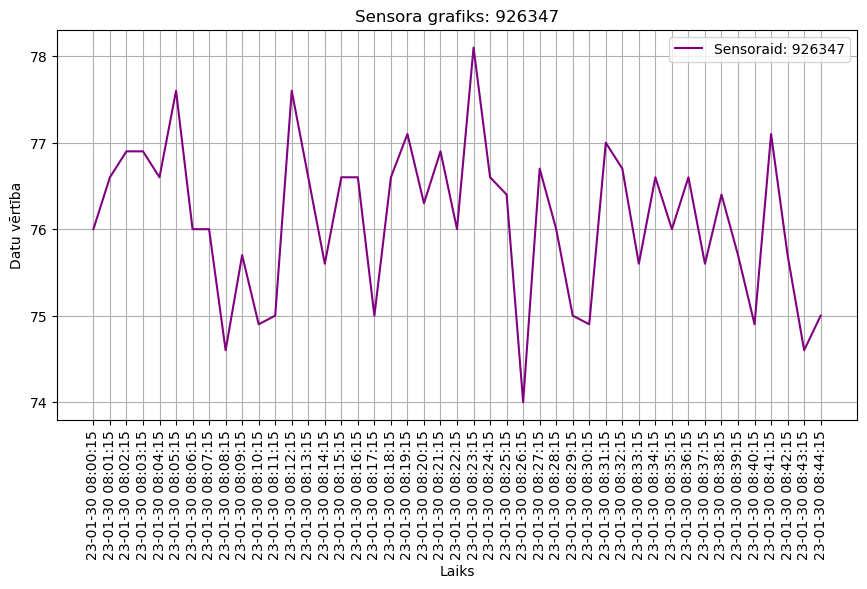

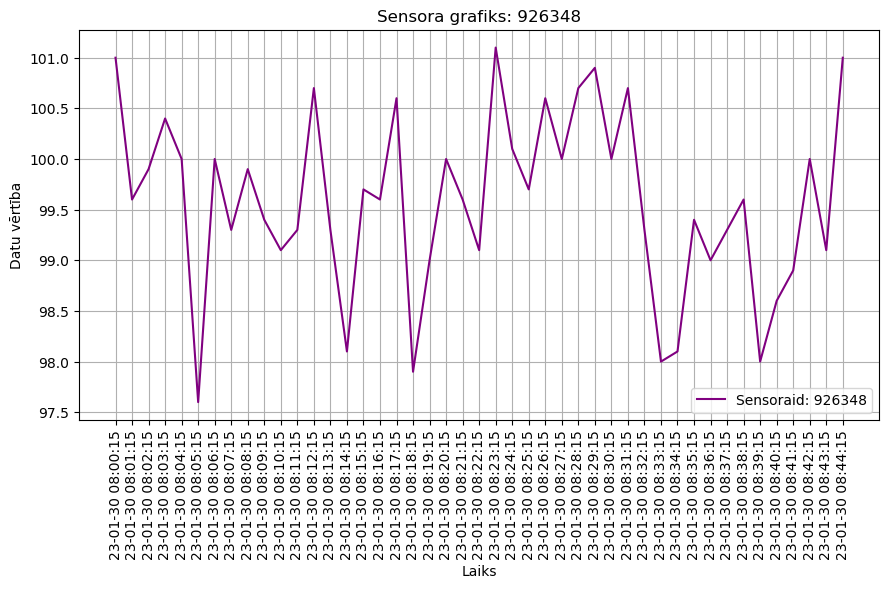

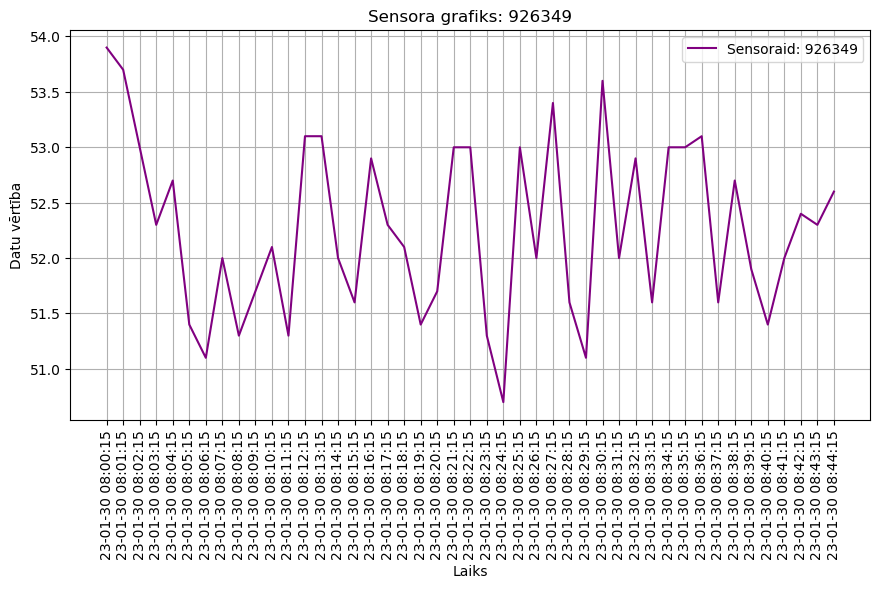

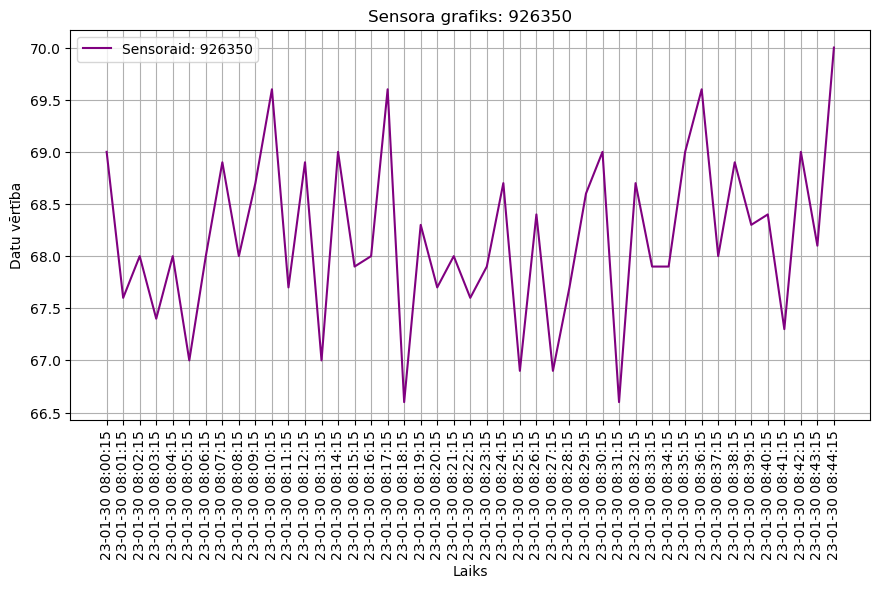

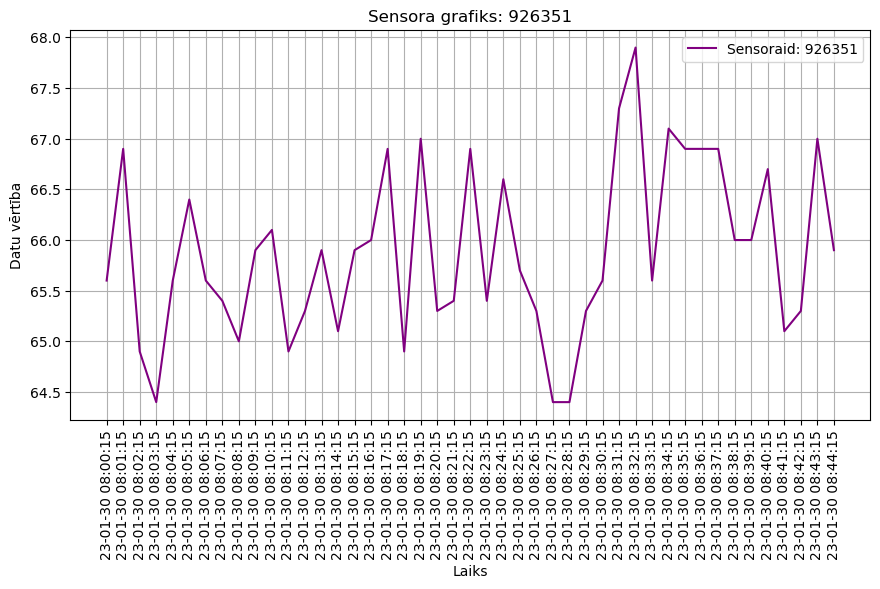

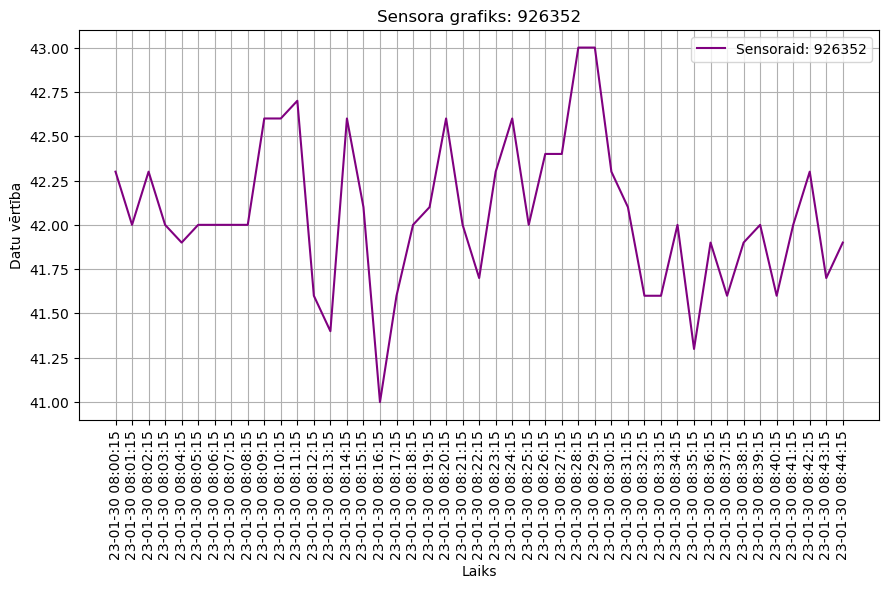

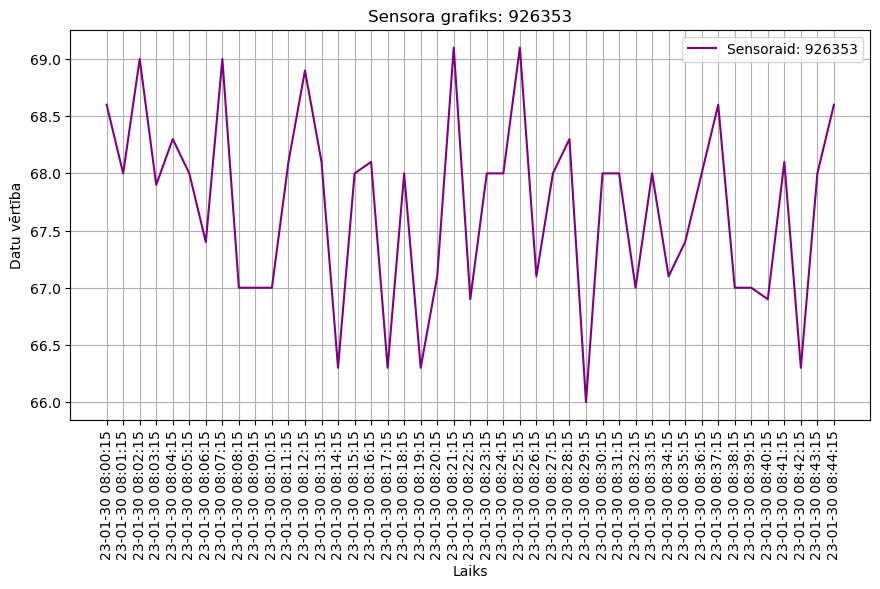

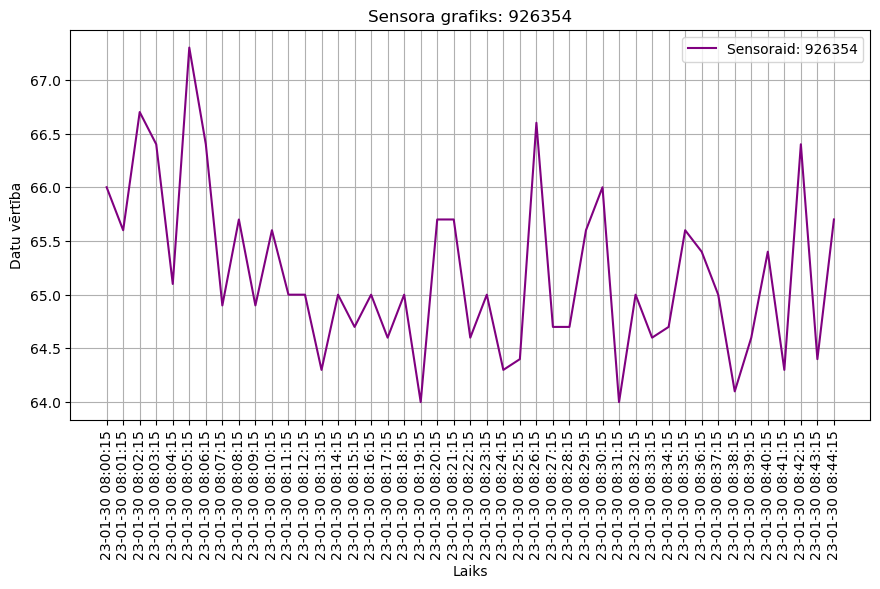

In [8]:
for key in sensoruDictionary.keys():
    
    valuex=[]
    laiksx=[]
    #mainigaisvalue=''
    #mainigaislaiks=''
    for tupl in sensoruDictionary['{}'.format(key)]:
        valuex.append(float(tupl[0]))
        laiksx.append(tupl[1])
    #print(valuex)
    fig_1=plt.figure(figsize=(10,6),dpi=100)
    axes_1 = fig_1.add_axes([0.1,0.3,0.8,0.65])
    axes_1.set_xlabel('Laiks')
    axes_1.set_ylabel('Datu vērtība')
    axes_1.set_title('Sensora grafiks: {}'.format(key))
    plt.xticks(rotation=90)#, ha='right')
    axes_1.plot(laiksx,valuex,label='Sensoraid: {}'.format(key),color='purple')
    #axes_1.plot(x_1,y_2,label='2. serveru skapis')
    axes_1.legend(loc=0)
    axes_1.grid()
    plt.show()
    
    
    
    